In [1]:
%matplotlib inline

iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900
iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900


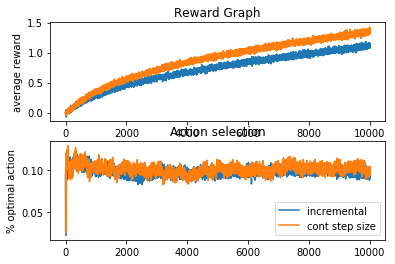

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
num_arms = 10

def run(q_t, epsilon, episodes):
    optimal_actions = np.argmax(q_t)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms)

    episode_rewards = []
    q_true = q_t
    opt_action_cnt = []
    for eps in range(episodes):
        
        if np.random.random() < epsilon:
            action_index = np.random.randint(num_arms)
        else:
            greedy = np.argmax(q_pred)
            actions = np.where(q_pred == np.argmax(q_pred))[0]
            
            if len(actions) == 0:
                action_index = greedy
            else:
                action_index = np.random.choice(actions)
        if epsilon == 0:
            action_index = np.argmax(q_pred)
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        q_true += np.random.normal(0.0, 0.01, num_arms)
    return episode_rewards, opt_action_cnt

def run_inc(q_t, epsilon, episodes):
    optimal_actions = np.argmax(q_t)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms)

    episode_rewards = []
    q_true = q_t
    opt_action_cnt = []
    for eps in range(episodes):
        
        if np.random.random() < epsilon:
            action_index = np.random.randint(num_arms)
        else:
            greedy = np.argmax(q_pred)
            actions = np.where(q_pred == np.argmax(q_pred))[0]
            
            if len(actions) == 0:
                action_index = greedy
            else:
                action_index = np.random.choice(actions)
        if epsilon == 0:
            action_index = np.argmax(q_pred)
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
        alpha = 1 / action_counts[action_index]
#         alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        q_true += np.random.normal(0.0, 0.01, num_arms)
    return episode_rewards, opt_action_cnt



def run_env():
    num_bandits = 2000
    num_episodes = 10000
    num_arms = 10
    # epsilons = [0.1, 0.01]
    epsilons = {'inc': 0.1, 'alpha': 0.1 }
    inc_rew = []
    inc_cnt = []

    alpha_rew = []
    alpha_cnt = []

    for eps in epsilons:
        episode_rew = np.zeros(num_episodes)
        opt_ac_cnt = np.zeros(num_episodes)
        
        for i in range(num_bandits):
#             q_true = np.random.normal(0.0, 1.0, num_arms)
            q_true = np.zeros(num_arms) # start equal
            if i % 100 == 0:
                print('iteration : ', i)
            if eps == 'inc':
                ep_rew, opt_ac = run_inc(q_true, epsilons[eps], num_episodes)
            else:
                ep_rew, opt_ac = run(q_true, epsilons[eps], num_episodes)
            episode_rew += np.array(ep_rew)
            opt_ac_cnt += np.array(opt_ac)
        
        avg_rew = episode_rew / num_bandits
        avg_cnt = opt_ac_cnt / num_bandits

        if eps == 'inc':
            inc_cnt = avg_cnt
            inc_rew = avg_rew
        elif eps == 'alpha':
            alpha_cnt = avg_cnt
            alpha_rew = avg_rew
        # axs[0].ylabel('Rewards')
        # axs[0].xlabel('Steps')
        # axs[0].plot(avg_rew, label = 'epsilon: {}'.format(eps))
        # axs[1].plot(avg_cnt, label = 'epsilon: {}'.format(eps))
    
    axs[0].title.set_text('Reward Graph')
    axs[0].plot(inc_rew, label='incremental')
    axs[0].plot(alpha_rew, label='cont step size')
    axs[0].set_xlabel('steps')
    axs[0].set_ylabel('average reward')
    # plt.show()

    axs[1].title.set_text('Action selection')
    axs[1].plot(inc_cnt, label='incremental')
    axs[1].plot(alpha_cnt, label='cont step size')
    axs[1].set_ylabel('% optimal action')
    
    plt.legend()
    plt.show()

    
    
run_env()